# mDNS security - Analysis

In [1]:
import sys, os
sys.path.append("utils/")
from analysis_utils import *
from data_analysis import *

# 1. Ping RTTs plots

### 1.1. Time Series

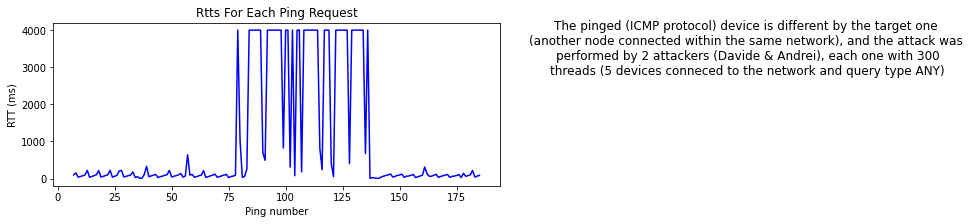

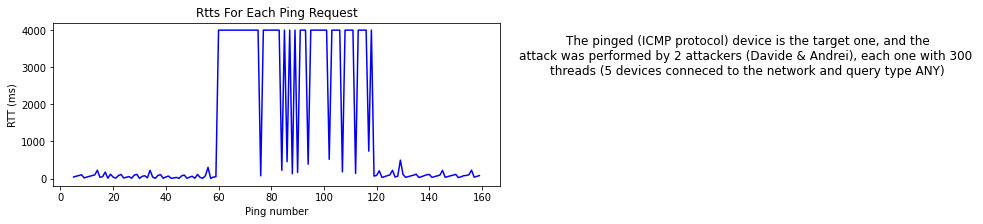

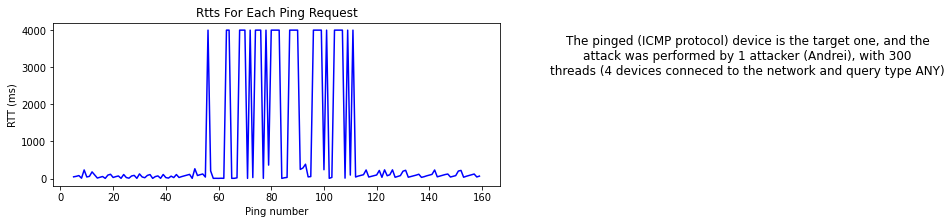

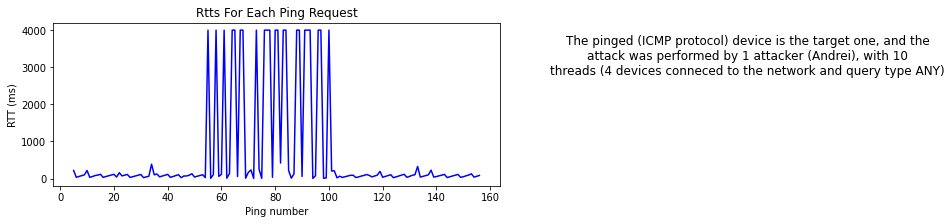

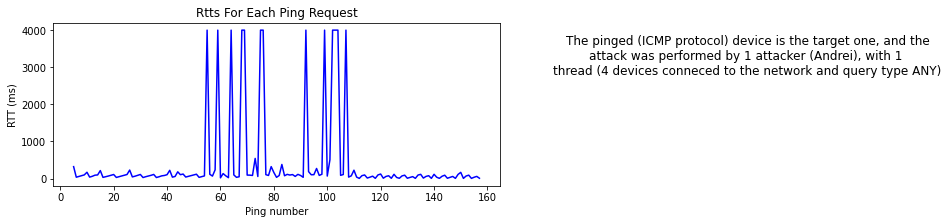

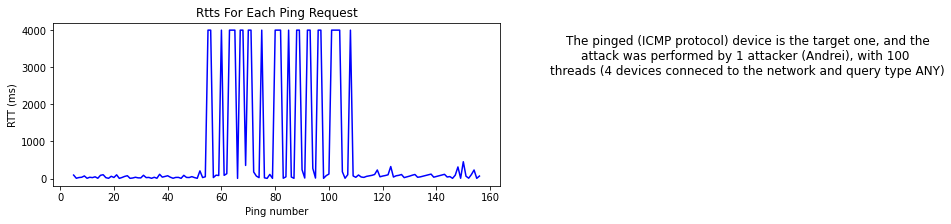

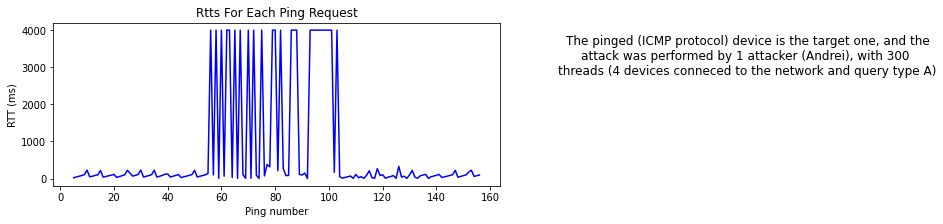

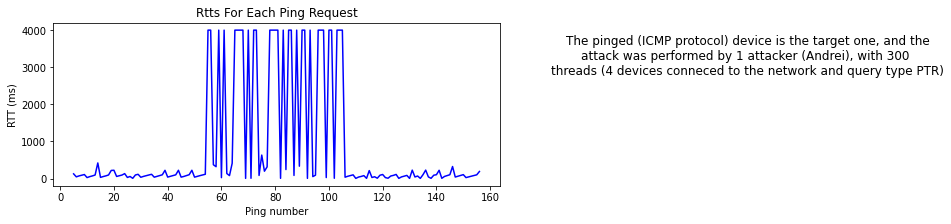

In [2]:
""" Time series showing for each ping request its RTT (for each attack performed) """
for filename in os.listdir("./data/ping"):
    plot_RTT_per_ping("./data/ping/"+filename)

### 1.2. Boxplots

Mann-Whitney U test(statistics: 3545.0, p-value: 1.653018341088515e-13)
Statistical significant? Yes :)  - different means


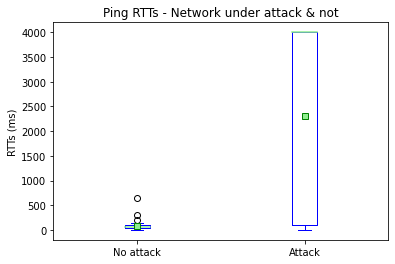

In [3]:
""" Statistical Test: Mann-Whitney U Test """

""" Compare the mean of 2 No attack & Attack samples - Mann-Whitney U does not assumes that the distribution is normal, 
    furthermore the two samples does not must have the same length """
    
""" The null hypothesis for this test is that the two groups have the same distribution, while the alternative hypothesis 
is that one group has larger (or smaller) values than the other - CIT. https://www.mit.edu/~6.s085/notes/lecture5.pdf """

perform_mannwhitneyu_test("./data/ping/", 0.05)

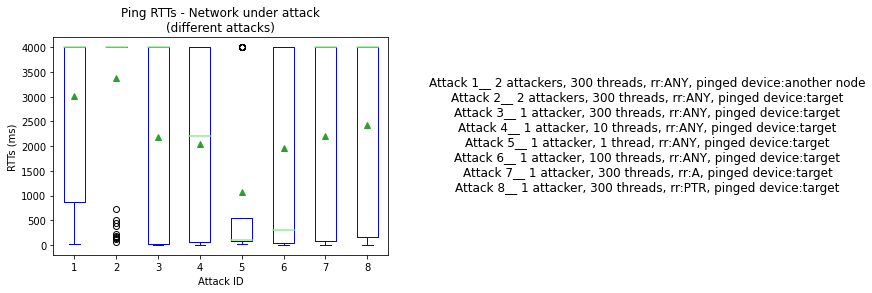

In [4]:
""" Boxplot of different attacks ping RTTs """
plot_boxplot2("./data/ping/")

## 2. mDNS queries RTTs plots

### 2.1. Time Series

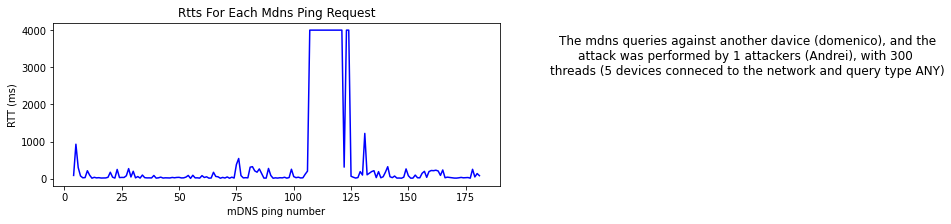

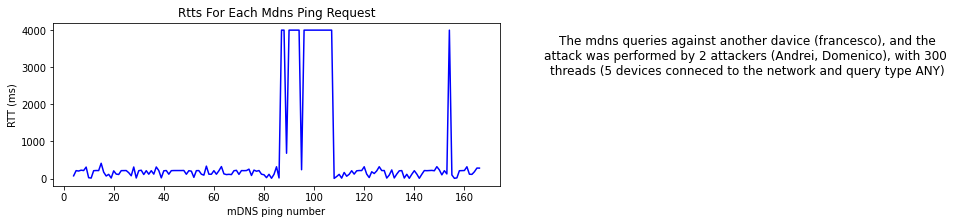

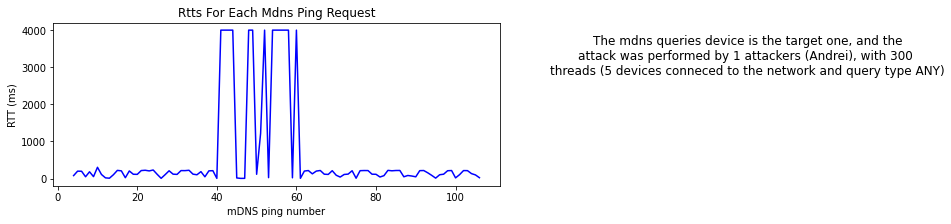

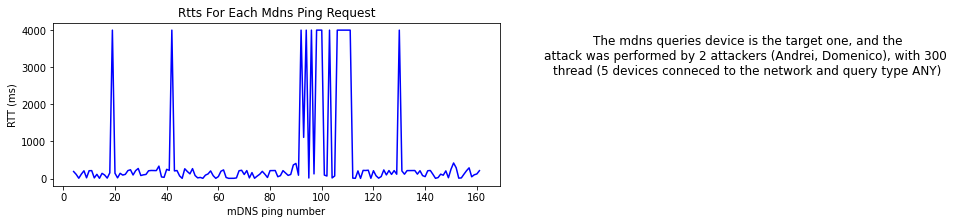

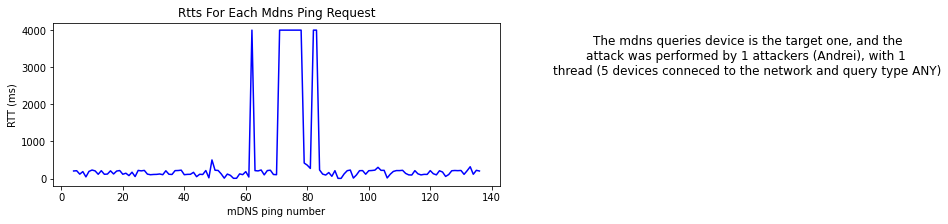

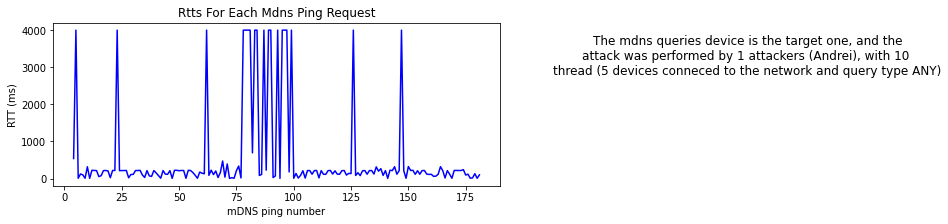

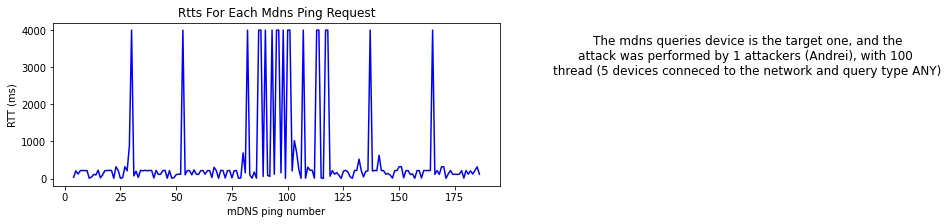

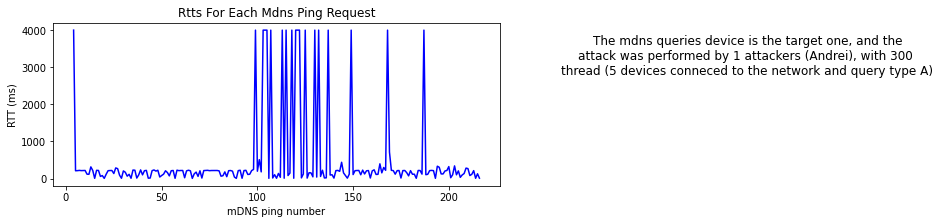

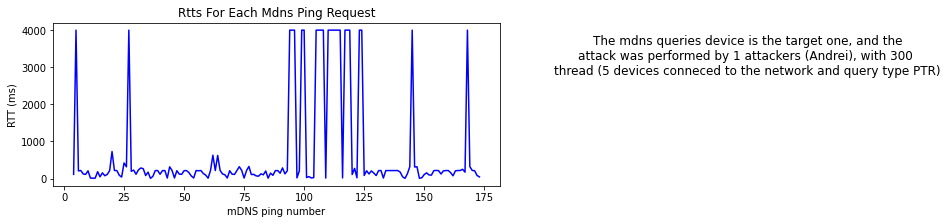

In [5]:
""" Time series showing for each mDNS ping request its RTT (for each attack performed) """

for filename in os.listdir("./data/mdns"):
    plot_RTT_per_ping("./data/mdns/"+filename, mdns=True)


### 2.2. Boxplots

Mann-Whitney U test(statistics: 7022.0, p-value: 9.102695310411377e-24)
Statistical significant? Yes :)  - different means


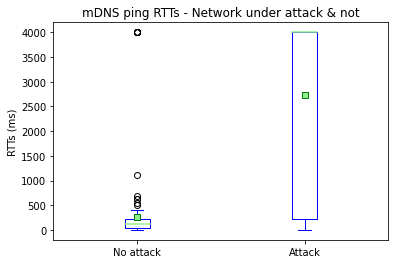

In [6]:
""" Statistical Test: Mann-Whitney U Test """

perform_mannwhitneyu_test("./data/mdns/", 0.05, mdns=True)

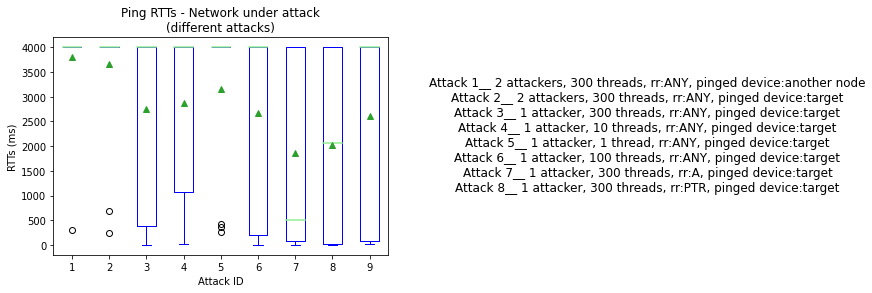

In [7]:
""" Boxplot of different attacks mDNS ping RTTs """
plot_boxplot2("./data/mdns/", mdns=True)